## $$ Session-16-Assignment-1 $$

In this assignment students have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference. 
The raw image is available in spicy.misc package with the name face. 

In [1]:
import numpy as np
from scipy import misc
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage.measure import compare_ssim as ssim

In [2]:
face = misc.face(gray=True)
face.shape

(768, 1024)

In [3]:
n_clusters = 5
np.random.seed(0)

In [4]:
X = face.reshape(face.shape[0]*face.shape[1],1)
k_means = KMeans(n_clusters=n_clusters, n_init=10)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

### create an array from labels and values

In [5]:
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

vmin = face.min()
vmax = face.max()
face_compressed.shape

(768, 1024)

### original face

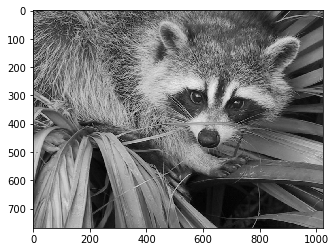

In [6]:
plt.figure(10)
plt.imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=270)

### compressed face

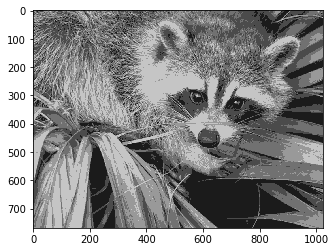

In [7]:
plt.figure(2)
plt.imshow(face_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

In [8]:
def compare_images(imageA, imageB, title):
    
    fig = plt.figure(figsize=(16,9))
    plt.title(title)   
 
    #Shows first image
    ax = fig.add_subplot(1, 2, 1)    
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
 
    #Shows the second image
    ax = fig.add_subplot(1, 2, 2)    
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
 
    #Shows the images   
    plt.show()

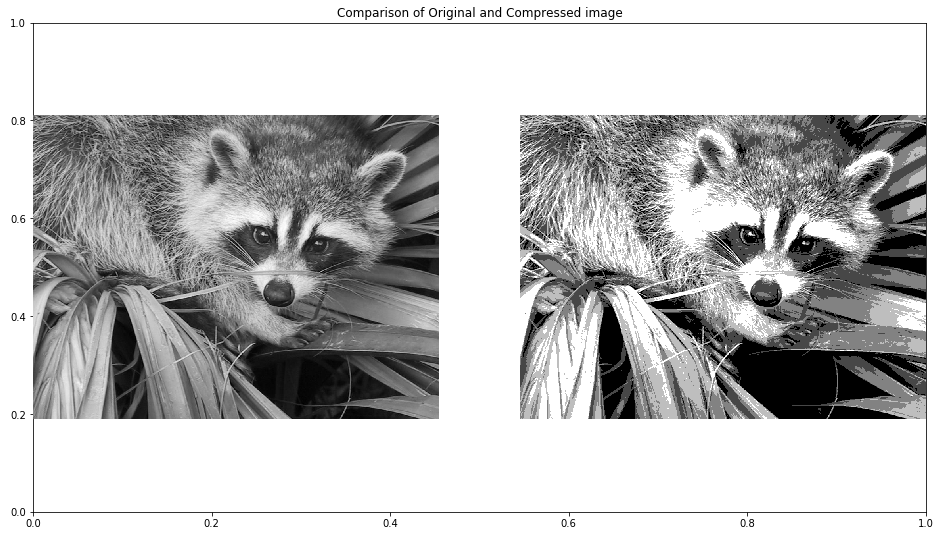

In [9]:
compare_images(face, face_compressed, "Comparison of Original and Compressed image")